SNMでの曲線での分離

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_regions(clf, X, y):
    xx1, xx2 = np.meshgrid(np.arange(0, 12, 0.1),
                           np.arange(0, 12, 0.1))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

In [12]:
import pandas as pd
df = pd.read_csv('./input/data.csv')
df.head(3)

,x0,x1,y
0,2.413141,1.166672,0.0
1,4.983929,2.296247,0.0
2,3.402277,3.142005,0.0


In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

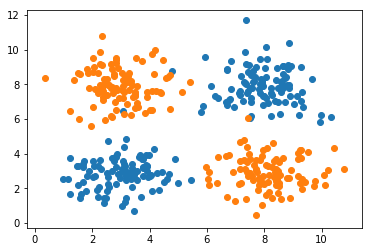

In [14]:
plt.scatter(X[y==0][:,0],X[y==0][:,1])
plt.scatter(X[y==1][:,0],X[y==1][:,1]);

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
X,y,test_size=0.3,random_state=0)

In [16]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
svm.score(X_test,y_test)

0.9916666666666667

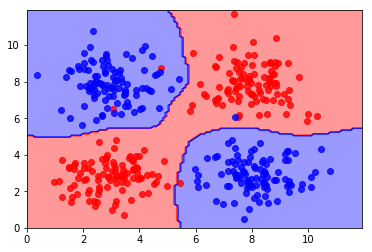

In [19]:
plot_regions(svm,X,y);